<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practicing K-Means:  Isotopic Composition Plutonium Batches

_Authors: Dave Yerrington (SF)_


---

We have a nice [data dictionary](https://vincentarelbundock.github.io/Rdatasets/doc/cluster/pluton.html)

    Pu238 : the percentages of (238)Pu, always less than 2 percent.

    Pu239 : the percentages of (239)Pu, typically between 60 and 80 percent (from neutron capture of Uranium, (238)U).

    Pu240 : percentage of the plutonium 240 isotope.

    Pu241 : percentage of the plutonium 241 isotope.
    
This is supplemental practice you can finish to get more familliar with K-Means (ie: not required).  This data is fairly odd and you will see that K-Means may not be ideal in a certain respect but the takeaway is that it can do an ok job with whispy, elongated shapes.  A more ideal model would be DBSCAN or a hierachical clustering model.

In [41]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

%matplotlib inline

In [2]:
csv_file = "https://vincentarelbundock.github.io/Rdatasets/csv/cluster/pluton.csv"

df = pd.read_csv(csv_file)
df.head()

,Unnamed: 0,Pu238,Pu239,Pu240,Pu241
0,1,0.126,75.804,21.204,2.180
1,2,0.133,75.515,21.408,2.240
2,3,0.127,75.175,21.668,2.305
3,4,0.156,78.872,18.428,1.906
4,5,0.503,73.317,20.223,4.128


###  Use Pu239 and Pu240 as our features.
1. Select only columns "Pu239" and "Pu240" to use for our example.
1. Plot "Pu239" and "Pu240" for visual reference.


In [9]:
# A:
X = df[['Pu239','Pu240']]
X.head()

,Pu239,Pu240
0,75.804,21.204
1,75.515,21.408
2,75.175,21.668
3,78.872,18.428
4,73.317,20.223


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1157fa310>]],
      dtype=object)

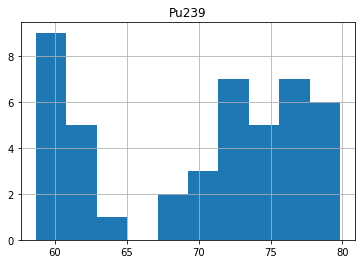

In [6]:
df[['Pu239']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116245610>]],
      dtype=object)

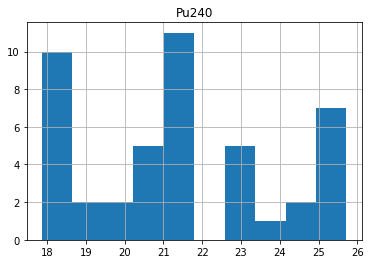

In [7]:
df[['Pu240']].hist()

### Next, use K-Means to cluster this data using "Pu239" and "Pu240" features
Initialize an instance of `KMeans` from `sklearn`, initialized for K=3 clusters.  Fit our sliced dataframe with the `fit`.

In [12]:
# A:
km = KMeans(n_clusters=3, random_state=20148)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=20148, tol=0.0001, verbose=0)

### Assign clusters assignments (predictions) back to the original dataframe

In [13]:
# A: 
df['cluster'] = km.labels_
df.head()

,Unnamed: 0,Pu238,Pu239,Pu240,Pu241,cluster
0,1,0.126,75.804,21.204,2.180,1
1,2,0.133,75.515,21.408,2.240,1
2,3,0.127,75.175,21.668,2.305,1
3,4,0.156,78.872,18.428,1.906,1
4,5,0.503,73.317,20.223,4.128,1


### Reference the coordinates for the centroids, plot with your "Pu239" and "Pu240" scatter plot
Plot the centroids from the model object with the scatter of "Pu239" and "Pu240".

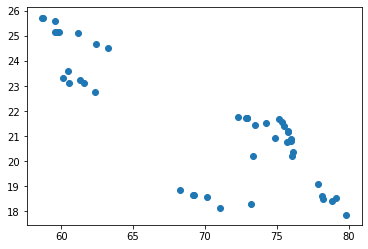

In [44]:
plt.scatter(df[['Pu239']],df[['Pu240']])

### Scale your data, rerun your model, then plot.
This should help slightly but you should compare before and after.

<Figure size 504x504 with 0 Axes>

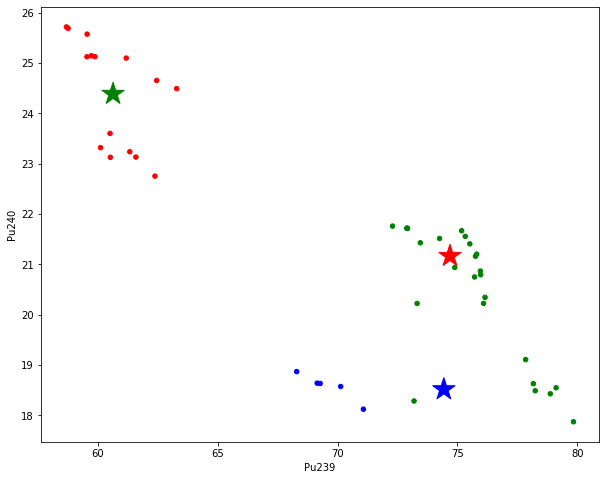

In [30]:
# A:
sc= StandardScaler()
X = sc.fit_transform(df.loc[:,["Pu239","Pu240"]])

X.mean(axis=0)

X.std(axis=0)

km = KMeans(n_clusters=3, random_state=20148)
km.fit(X)

km.cluster_centers_

sc.inverse_transform(km.cluster_centers_)

centroids = pd.DataFrame(
    sc.inverse_transform(km.cluster_centers_),
    columns=["Pu239", "Pu240"]
)

plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue"]
df['color'] = df['cluster'].map(lambda p: colors[p])

ax = df.plot(    
    kind="scatter", 
    x="Pu239", y="Pu240",
    figsize=(10,8),
    c = df['color']
)

centroids.plot(
    kind="scatter", 
    x="Pu239", y="Pu240", 
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
);

### Might as well check that silhouette score
Just to confirm what your eyes are telling you.

In [42]:
# A: 
silhouette_score(X, km.labels_)

0.6332174776862322